In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance =pd.read_csv(r'C:\Users\febat\OneDrive\Desktop\Analystbuilder\python\Data Exploration\health_insurance.csv')

In [4]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [156]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [157]:
#group by region

grouped_by_region=insurance.groupby('region')['charges'].mean()

In [158]:
grouped_by_region.sort_values(ascending=True)

region
southwest    12346.937377
northwest    12417.575374
northeast    13406.384516
southeast    14735.411438
Name: charges, dtype: float64

In [159]:
#REGION

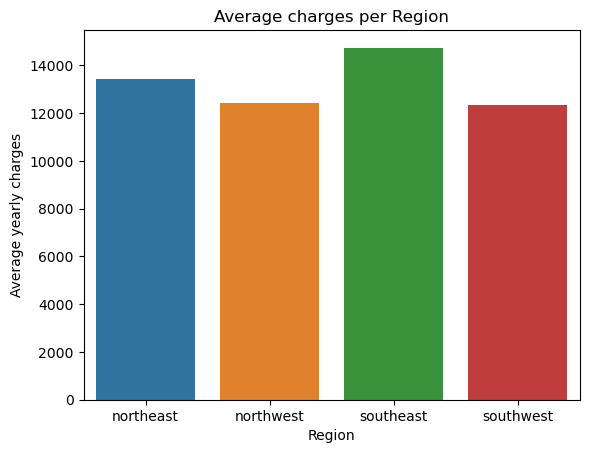

In [160]:
sns.barplot(x=grouped_by_region.index,y=grouped_by_region.values,)

plt.xlabel('Region')
plt.ylabel('Average yearly charges')
plt.title('Average charges per Region')

plt.show()

In [161]:
#SMOKER

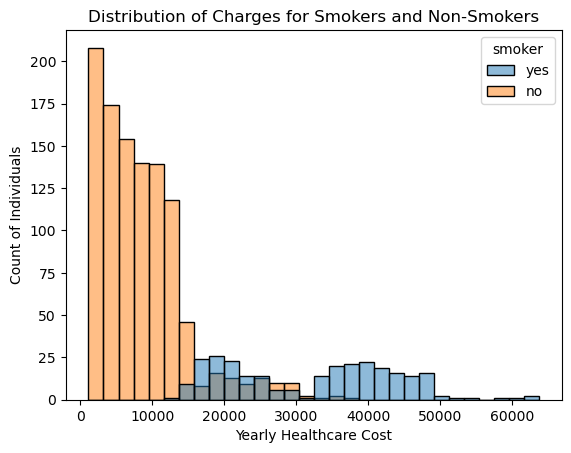

In [162]:
sns.histplot(data=insurance, x='charges',hue='smoker')

plt.xlabel('Yearly Healthcare Cost')
plt.ylabel('Count of Individuals')
plt.title('Distribution of Charges for Smokers and Non-Smokers')

plt.show()

In [13]:
smokers =insurance[insurance['smoker']=='yes']
smokers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [22]:
#Count of males and females who smoke
smokers['sex'].value_counts()

male      159
female    115
Name: sex, dtype: int64

In [47]:
smokers.groupby(['sex', 'region']).size().reset_index(name='counts')

,sex,region,counts
0,female,northeast,29
1,female,northwest,29
2,female,southeast,36
3,female,southwest,21
4,male,northeast,38
5,male,northwest,29
6,male,southeast,55
7,male,southwest,37


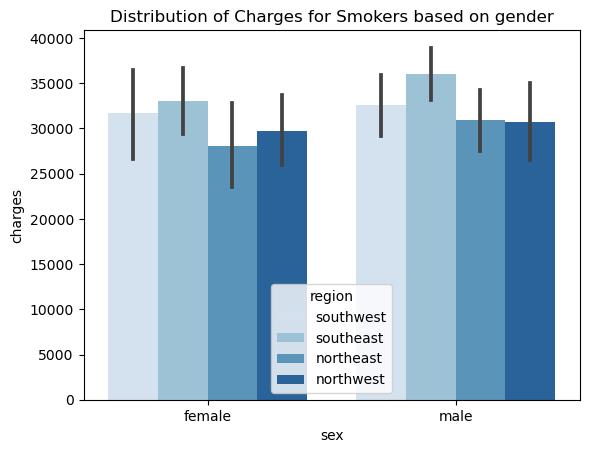

In [37]:
sns.barplot(data= smokers,x='sex',y='charges',hue='region',palette = "Blues")
plt.title('Distribution of Charges for Smokers based on gender')
plt.show()

In [163]:
#BMI

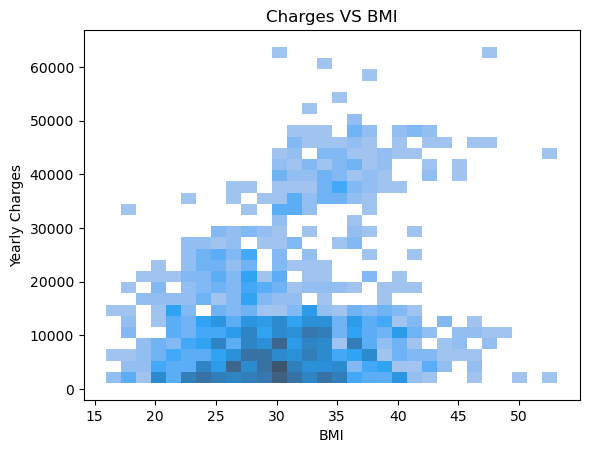

In [164]:
sns.histplot(data=insurance, y='charges',x='bmi',bins=30)

plt.xlabel('BMI')
plt.ylabel('Yearly Charges')
plt.title('Charges VS BMI')

plt.show()

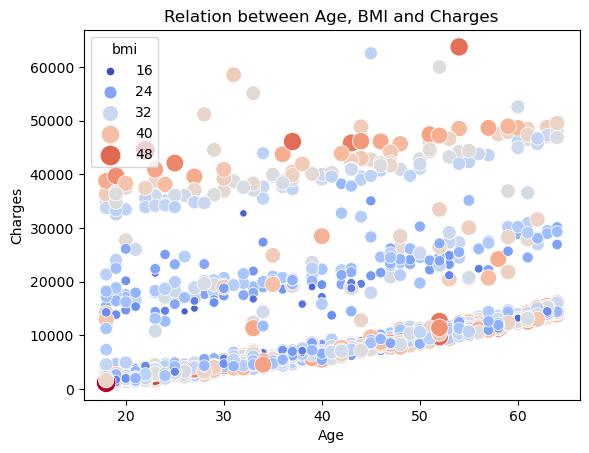

In [165]:
sns.scatterplot(data=insurance,x='age',y='charges',hue='bmi',size='bmi',sizes=(20,200),palette='coolwarm')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relation between Age, BMI and Charges')

plt.show()

In [166]:
#GENDER

In [167]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

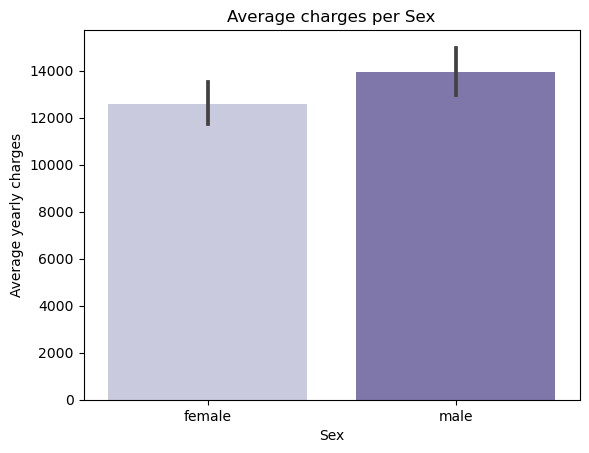

In [51]:
sns.barplot(data=insurance, x='sex',y='charges',estimator='mean', palette='Purples')

plt.xlabel('Sex')
plt.ylabel('Average yearly charges')
plt.title('Average charges per Sex')

plt.show()

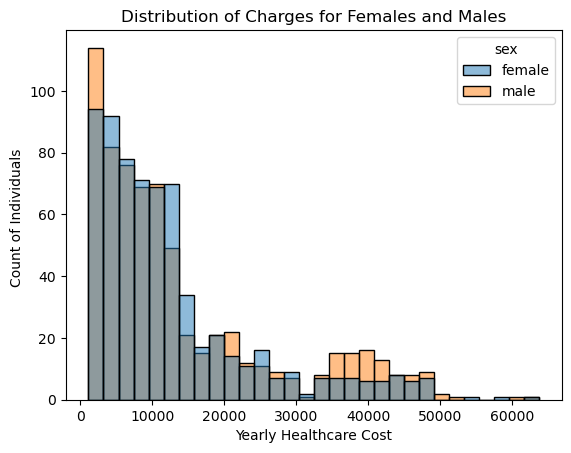

In [169]:
sns.histplot(data=insurance, x='charges',hue='sex')

plt.xlabel('Yearly Healthcare Cost')
plt.ylabel('Count of Individuals ')
plt.title('Distribution of Charges for Females and Males')

plt.show()

In [170]:
#NO. OF CHILDREN

In [171]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

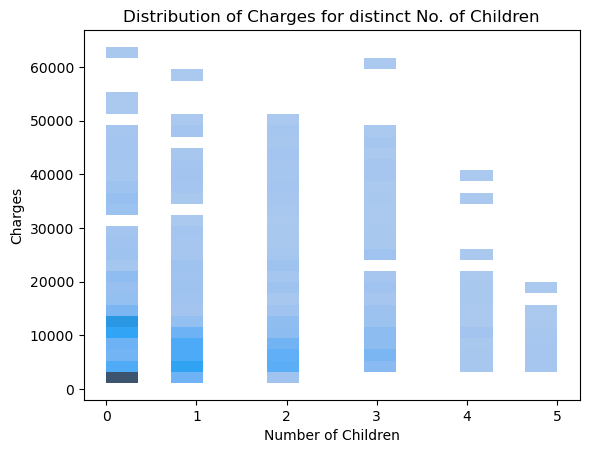

In [172]:
sns.histplot(data=insurance, y='charges',x='children')

plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Distribution of Charges for distinct No. of Children')

plt.show()

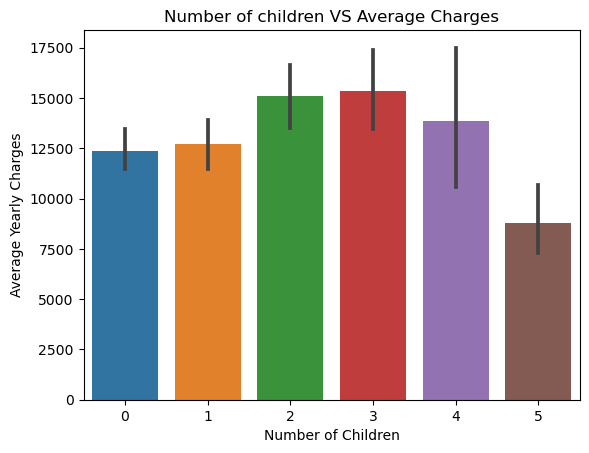

In [173]:
sns.barplot(data=insurance, y='charges',x='children',estimator='mean')

plt.xlabel('Number of Children')
plt.ylabel('Average Yearly Charges')
plt.title('Number of children VS Average Charges')

plt.show()

In [174]:
#CORRELATION

In [175]:
insurance.corr(method='spearman')

C:\Users\febat\AppData\Local\Temp\ipykernel_10520\3982608248.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance.corr(method='spearman')


,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


C:\Users\febat\AppData\Local\Temp\ipykernel_10520\3716703198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=insurance.corr(),annot=True,cmap='coolwarm')


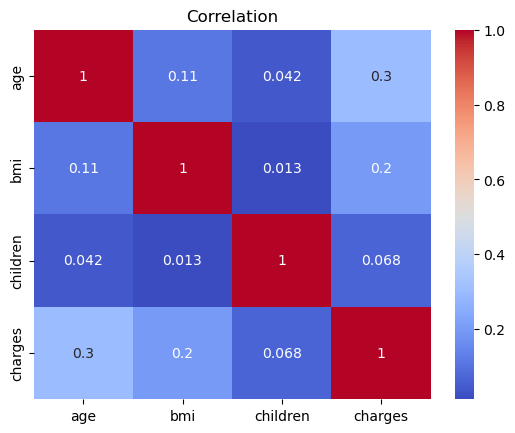

In [176]:
sns.heatmap(data=insurance.corr(),annot=True,cmap='coolwarm')


plt.title('Correlation')

plt.show()